**Riley Payung**

**CDS 292**

**04/30/2020**

**Assignment 10**

#### Imports

In [71]:
import matplotlib.pyplot as plt
import networkx as netx
import numpy as np

#### Question 2

.

.

Paths:

    1,2: 1 <-> 2
    
    1,3: 1 <-> 3
    
    2,3: 2 <-> 3
    
b<sub>1</sub>=2 | b<sub>2</sub>=3 | b<sub>3</sub>=2

.

.

Paths:
    
    1,2: 1 <-> 2
    
    1,3: 1 <-> 2 <-> 3
    
    1,4: 1 <-> 2 <-> 4
    
    2,3: 2 <-> 3
    
    2,4: 2 <-> 4
    
    3,4: 3 <-> 2 <-> 4
    
b<sub>1</sub>=3 | b<sub>2</sub>=6 | b<sub>3</sub>=3 | b<sub>4</sub>=3

Everything increases by 1 except for b<sub>2</sub>, which doubles in size.

#### Question 3

b<sub>2</sub> = 5 - 1 + (2 - 1) * (5 - 2) = 4 + 1 * 3 = 4 + 3 = 7

#### Question 4

b<sub>5</sub> = - 1 + (5 * 10) - 5<sup>2</sup> = -1 + 50 - 25 = -1 + 25 = 24

#### Question 5

Let us say that the ns are the follwing:

n<sub>1</sub> = 4

n<sub>2</sub> = 4

n<sub>3</sub> = 4

n<sub>4</sub> = 4

Therefore n = 16 + 1 = 17.


In [53]:
n = 17;
b = [];

for i in range(1,n):
    b.append(-1 + (i * n) - (i**2))

In [60]:
print(b)

[15, 29, 41, 51, 59, 65, 69, 71, 71, 69, 65, 59, 51, 41, 29, 15]


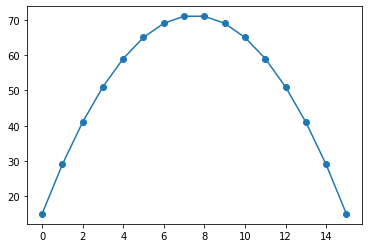

In [74]:
plt.plot(b, marker='o')
plt.show()

#### Question 6

b<sub>1</sub> = -1 + 5 - 1 = 3

b<sub>2</sub> = -1 + 2 * 5 - 4 = -1 + 10 - 4 = 5

b<sub>3</sub> = -1 + 3 * 5 - 9 = -1 + 15 - 9 = 5

b<sub>4</sub> = -1 + 4 * 5 - 16 = -1 + 20 - 16 = 3

b<sub>5</sub> = -1 + 5 * 5 - 25 = -1 + 25 - 25 = -1

#### Question 9


.

.

Paths:
    
    1,2: 1 <-> 2
    
    1,3: 1 <-> 2 <-> 3, 1 <-> 4 <-> 3
    
    1,4: 1 <-> 4
    
    2,3: 2 <-> 3
    
    2,4: 2 <-> 3 <-> 4, 2 <-> 1 <-> 4
    
    3,4: 3 <-> 4
        
b<sub>1</sub>=5 | b<sub>2</sub>=5 | b<sub>3</sub>=5 | b<sub>4</sub>=5

#### Question 10

b<sub>i</sub> = n + 1

#### Question 11

Lets assume a star network of n = 5 for the following:
    
.

.

.

Paths:
    1,2: 1 <-> 2
    1,3: 1 <-> 2 <-> 3, 1 <-> 4 <-> 3
    1,4: 1 <-> 4
    2,3: 2 <-> 3
    2,4: 2 <-> 3 <-> 4, 2 <-> 1 <-> 4
    3,4: 3 <-> 4
    
b<sub>1</sub>=4 | b<sub>2</sub>=4 | b<sub>3</sub>=4 | b<sub>4</sub>=4 | b<sub><b>5(HUB)</b></sub>=10

Considering 5 is our b<sub>hub</sub>, if we do the calculation with the equation:

$5 \choose 2$ $= \frac{5!}{2!(3!)} = \frac{120}{12} = 10$

We prove that the equation is the model for the hub centrality.

which is the same as:

$5 - 1 + $$4 \choose 2$ $= 4 + 6 = 10 <=> 10 =$ $5\choose 2$

#### Question 12

.

.

.

.

.

.

.

.

#### Question 14

In [5]:
# Load watergate network:
WG = netx.Graph();

watergateFile = open('watergate-testimony-links.dat','r');
for line in watergateFile:
    cLine = line.strip();
    items = cLine.split();
    WG.add_edge(items[0],items[1]);
    

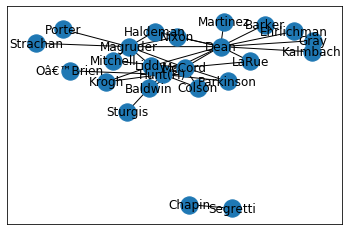

In [16]:
netx.draw_networkx(WG)
plt.show()

In [46]:
def BC1 (G , o ) :
    A =[ o ]
    V =[]
    l =0
    p ={}
    m ={}
    z ={}
    p [ o ]=[]
    m [ o ]=1
    z [ l ]=[ o ]
    while len( A ) >0:
        # print len(A)
        l = l +1
        nA =[]
        for i in A :
            for j in G . neighbors ( i ) :
                if ( j not in V ) and ( j not in A ) :
                    if j not in nA :
                        nA . append ( j )
                        z [ l ]= z . get (l ,[])
                        z [ l ]. append ( j )
                    p [ j ]= p . get (j ,[])
                    p [ j ]. append ( i )
                    m [ j ]= m . get (j ,0)
                    m [ j ]= m [ j ]+ m [ i ]
            V . append ( i )
        A = nA
    lf =l -1
    b ={}
    for i in G . nodes () :
        b [ i ]=0
    for l in range ( lf ,0 , -1) :
        for i in z [ l ]:
            b [ i ]= b [ i ]+ m [ i ]
            for j in p [ i ]:
                b [ j ]= b [ j ]+ m [ j ]* b [ i ]/ m [ i ]
    
    return ( b )


In [47]:
def BC ( G ) :
    B ={}
    for i in G . nodes () :
        B [ i ]=0
    for o in G . nodes () :
        b = BC1 (G , o )
        for i in b . keys () :
            B [ i ]= B [ i ]+ b [ i ]
    for i in G . nodes () :
        B [ i ]= B [ i ]/2
    return ( B )

In [48]:
G = BC(WG);

In [51]:
G

{'Baldwin': 93.0,
 'Hunt(H)': 110.0,
 'Liddy': 79.0,
 'McCord': 117.0,
 'Sturgis': 47.0,
 'Dean': 208.0,
 'Barker': 29.0,
 'Ehrlichman': 29.0,
 'Gray': 29.0,
 'Haldeman': 38.0,
 'Kalmbach': 29.0,
 'LaRue': 30.0,
 'Martinez': 29.0,
 'Nixon': 38.0,
 'Colson': 35.0,
 'Oâ€™Brien': 28.0,
 'Parkinson': 35.0,
 'Krogh': 39.0,
 'Magruder': 110.0,
 'Mitchell': 30.0,
 'Porter': 28.0,
 'Strachan': 28.0,
 'Segretti': 1.0,
 'Chapin': 1.0}

Dean has the highest centrality, at 208.0